In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from network import get_normalized_data

data = pd.read_csv('clearedDataset.csv', thousands='.', decimal=',', encoding='windows-1251')
train_data = data.sample(frac=0.7)
test_data = data.loc[~data.index.isin(train_data.index)]

normalized_train_data = get_normalized_data(train_data, 2)
train_mean = normalized_train_data.mean()
train_std = normalized_train_data.std()

normalized_test_data = get_normalized_data(test_data, 2)
normalized_test_data = (normalized_test_data - train_mean) / train_std

In [3]:
from network import Network, sigmoid, sigmoid_prime

network = Network([16, 60, 70, 2], sigmoid, sigmoid_prime, True)
errors = network.SGD(normalized_train_data, epochs=350, alpha=0.01, classes_count=2)

[16, 60, 70, 2]
epoch: 0 -  error:0.15216256778287116
epoch: 1 -  error:0.12275254021174385
epoch: 2 -  error:0.09016477380303604
epoch: 3 -  error:0.062025845795172264
epoch: 4 -  error:0.043568295955368354
epoch: 5 -  error:0.033466229629124836
epoch: 6 -  error:0.028283743541851727
epoch: 7 -  error:0.025610139134050386
epoch: 8 -  error:0.02418186122871645
epoch: 9 -  error:0.023383927812253156
epoch: 10 -  error:0.022916313091203764
epoch: 11 -  error:0.02262851696657297
epoch: 12 -  error:0.022442408489547972
epoch: 13 -  error:0.022316008349391903
epoch: 14 -  error:0.022226008718161872
epoch: 15 -  error:0.022159053867717278
epoch: 16 -  error:0.022107248889163513
epoch: 17 -  error:0.02206577745970951
epoch: 18 -  error:0.02203160459978161
epoch: 19 -  error:0.022002753211614094
epoch: 20 -  error:0.021977891523450196
epoch: 21 -  error:0.02195609267291542
epoch: 22 -  error:0.021936691485499968
epoch: 23 -  error:0.021919197157640003
epoch: 24 -  error:0.021903238688813508
ep

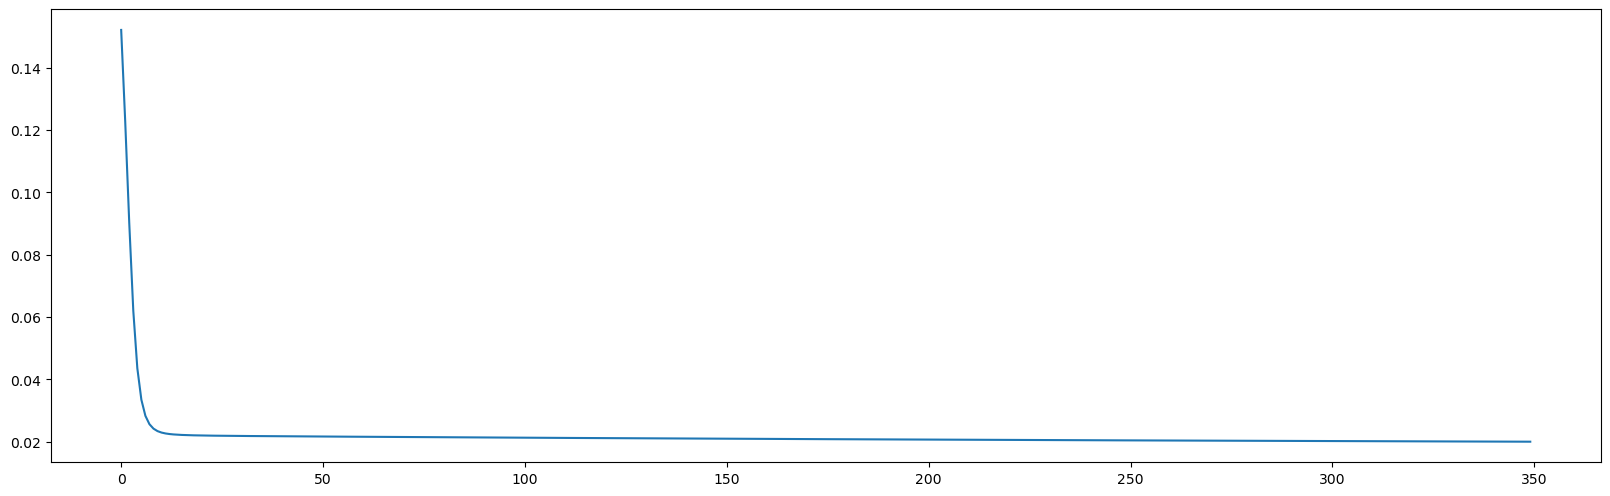

AttributeError: module 'network' has no attribute 'rmse'

In [6]:
import network
fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.subplot(3, 1, 1)
plt.plot(errors)
plt.show()
print(network.rmse(network, Network.prepare_data(normalized_test_data, 2)))

Метрики

r2:  0.8441044089746877
F-measure:  0.8053846153846153


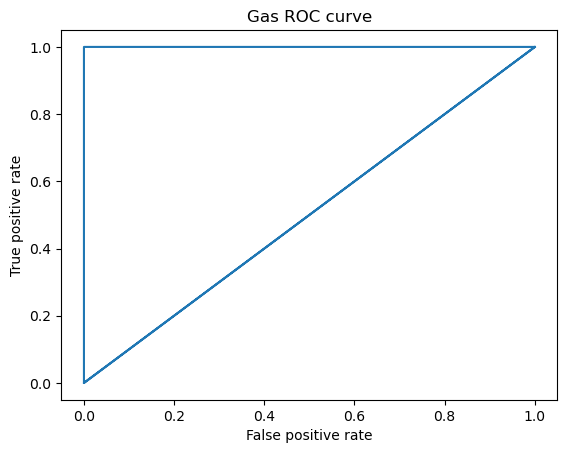

<Figure size 640x480 with 0 Axes>

In [10]:
import metrik
random_indices = np.random.choice(len(normalized_train_data), size=len(normalized_test_data), replace=False)
subset_normalized_train_data = normalized_train_data[random_indices]


print(metrik.calc_r_square(subset_normalized_train_data, normalized_test_data))


print(metrik.calc_f_measure(subset_normalized_train_data, normalized_test_data))

gas_total_fpr, gas_total_tpr = metrik.calc_roc(subset_normalized_train_data, normalized_test_data)

plt.plot(gas_total_fpr, gas_total_tpr)
plt.title('Gas ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
plt.clf()